In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv('Bank Customer Churn Prediction Dataset.csv')

In [3]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.groupby('products_number').products_number.count()

products_number
1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

In [10]:
df[['gender', 'products_number']] = df[['gender', 'products_number']].astype('category')

In [11]:
df['customer_id'] =  df['customer_id'].astype('object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       10000 non-null  object  
 1   credit_score      10000 non-null  int64   
 2   country           10000 non-null  object  
 3   gender            10000 non-null  category
 4   age               10000 non-null  int64   
 5   tenure            10000 non-null  int64   
 6   balance           10000 non-null  float64 
 7   products_number   10000 non-null  category
 8   credit_card       10000 non-null  int64   
 9   active_member     10000 non-null  int64   
 10  estimated_salary  10000 non-null  float64 
 11  churn             10000 non-null  int64   
dtypes: category(2), float64(2), int64(6), object(2)
memory usage: 801.2+ KB


<Figure size 1200x1000 with 0 Axes>

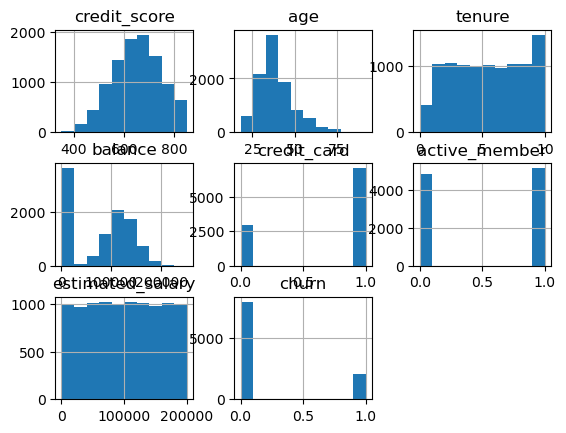

In [19]:
plt.figure(figsize=[12,10])
df.hist();

<AxesSubplot:>

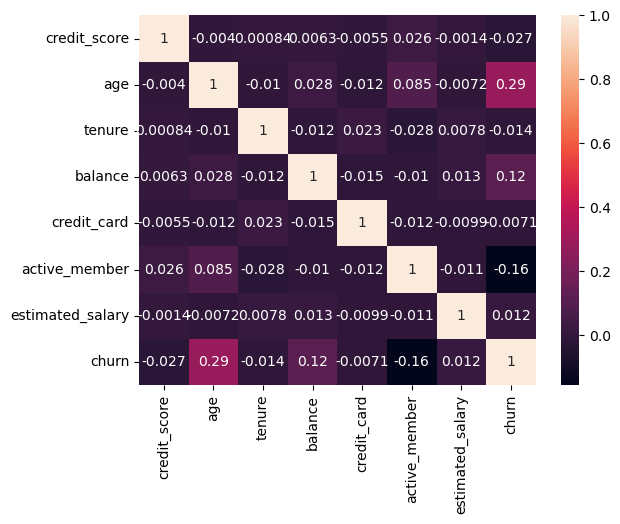

In [20]:
sns.heatmap(data= df.corr(), annot=True)

In [21]:
def age(x):
    if x <= 18:
        return 'Adolescence'
    elif x <= 39:
        return 'Young Adulthood'
    elif x <= 59:
        return 'Middle Adulthood'
    else:
        return 'Late Adulthood'
    
df['age_category'] = df['age'].apply(age)

Text(0, 0.5, 'Count')

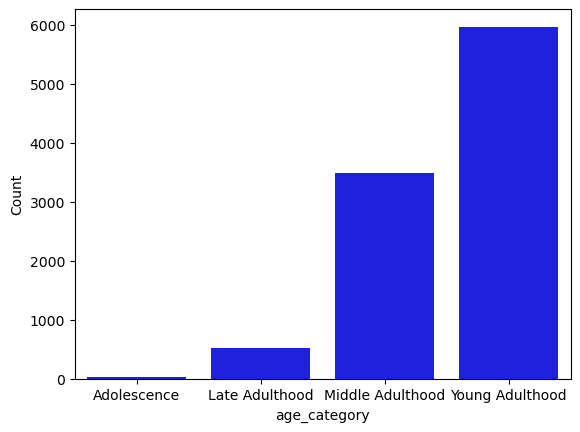

In [72]:
x = pd.DataFrame(df.groupby('age_category').age_category.count().sort_values())

sns.barplot(data= x, x= x.index, y= 'age_category', color='b')
plt.ylabel('Count')

In [75]:
x = df.groupby(['age_category', 'churn'])['age_category'].value_counts()

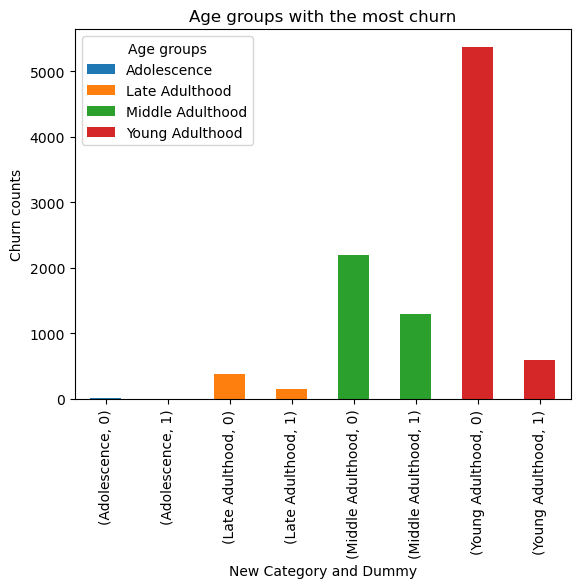

In [77]:
# unstack the count series and plot as a stacked bar plot
x.unstack().plot(kind='bar', stacked=True)

plt.xlabel('New Category and Dummy')
plt.ylabel('Churn counts')
plt.title('Age groups with the most churn')
plt.legend(title='Age groups')

plt.show()